Train image shape:  (60000, 28, 28) Train image labels:  (60000,)
Test image shape:  (10000, 28, 28) Test image labels:  (10000,)
image labels:  9
image:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0 

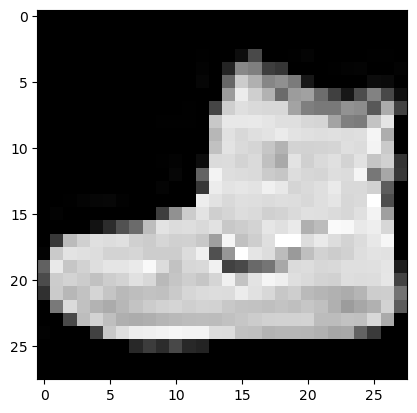

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train image shape: ", train_images.shape, "Train image labels: ", train_labels.shape)
print("Test image shape: ", test_images.shape, "Test image labels: ", test_labels.shape)
print("image labels: ", train_labels[0])
print("image: ", train_images[0])

plt.imshow(train_images[0], cmap = 'gray')
type(train_images[1,1,1])
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(train_images, train_labels, test_size= 0.2)

print(valid_x.shape)
print(valid_y.shape)
# One-hot encoding
train_y = tf.one_hot(train_y, depth = 10)
valid_y = tf.one_hot(valid_y, depth = 10)
test_y = tf.one_hot(test_labels, depth = 10)

In [25]:

train_x = train_x / 255.0
valid_x = valid_x / 255.0
test_x = test_images / 255.0



In [32]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, batch_size = 50, epochs=10, validation_data=(valid_x, valid_y))


Epoch 1/10
960/960 [==============================] - 1s 1ms/step - loss: 1.2126 - accuracy: 0.6445 - val_loss: 0.8494 - val_accuracy: 0.7212
Epoch 2/10
960/960 [==============================] - 1s 1ms/step - loss: 0.7559 - accuracy: 0.7524 - val_loss: 0.7006 - val_accuracy: 0.7698
Epoch 3/10
960/960 [==============================] - 1s 1ms/step - loss: 0.6576 - accuracy: 0.7839 - val_loss: 0.6330 - val_accuracy: 0.7922
Epoch 4/10
960/960 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.8004 - val_loss: 0.5923 - val_accuracy: 0.7997
Epoch 5/10
960/960 [==============================] - 1s 1ms/step - loss: 0.5714 - accuracy: 0.8100 - val_loss: 0.5641 - val_accuracy: 0.8099
Epoch 6/10
960/960 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.8188 - val_loss: 0.5455 - val_accuracy: 0.8190
Epoch 7/10
960/960 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.8249 - val_loss: 0.5294 - val_accuracy: 0.8192
Epoch 

In [35]:
acc = history.history[  'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))



Text(0.5, 1.0, 'Training and validation accuracy')

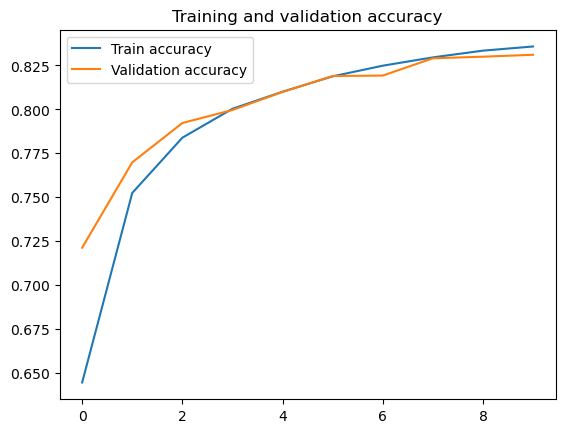

In [39]:
plt.plot(epochs, acc, label = "Train accuracy")
plt.plot(epochs,val_acc,label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title("Training and validation accuracy")

Text(0.5, 1.0, 'Training and validation loss')

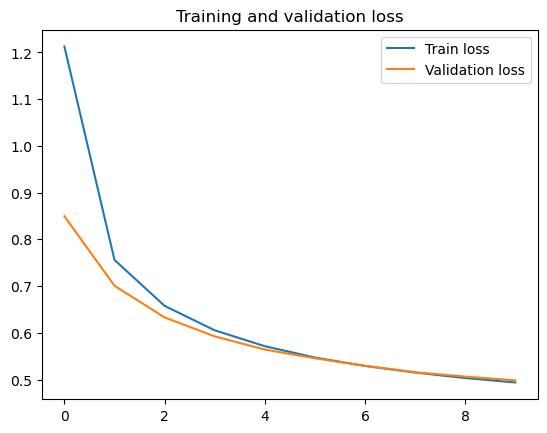

In [41]:
plt.plot(epochs, loss, label = "Train loss")
plt.plot(epochs,val_loss,label = "Validation loss")
plt.legend(loc="upper right")
plt.title("Training and validation loss")

In [43]:
classes = model.predict(test_x)


313/313 [==============================] - 0s 699us/step


In [47]:
print(classes[0])
print(test_y[0])

[0.10180517 0.08918261 0.09560751 0.10240365 0.08152214 0.16502215
 0.10949494 0.09581807 0.0832386  0.07590517]
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


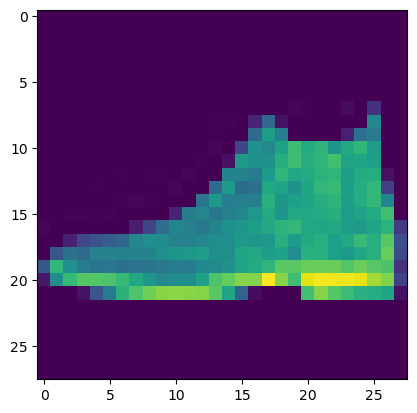

In [46]:
plt.imshow(test_x[0])